In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
pk = pd.read_csv('./parkinsons.csv')
pk = pk.dropna()

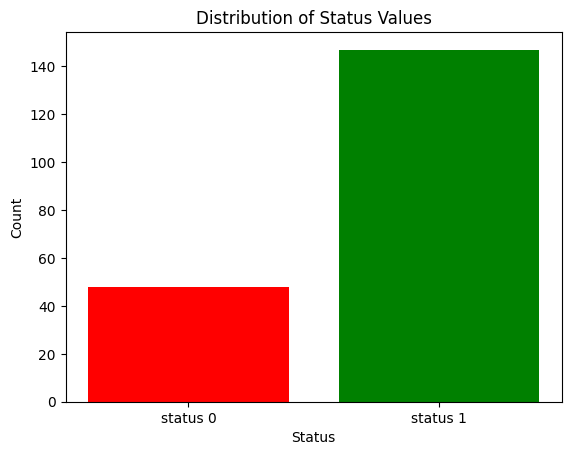

In [3]:
# Create a bar graph to show the distribution of status values
labels = ['status 0', 'status 1']
values = [48, 147]
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Values')
plt.show()

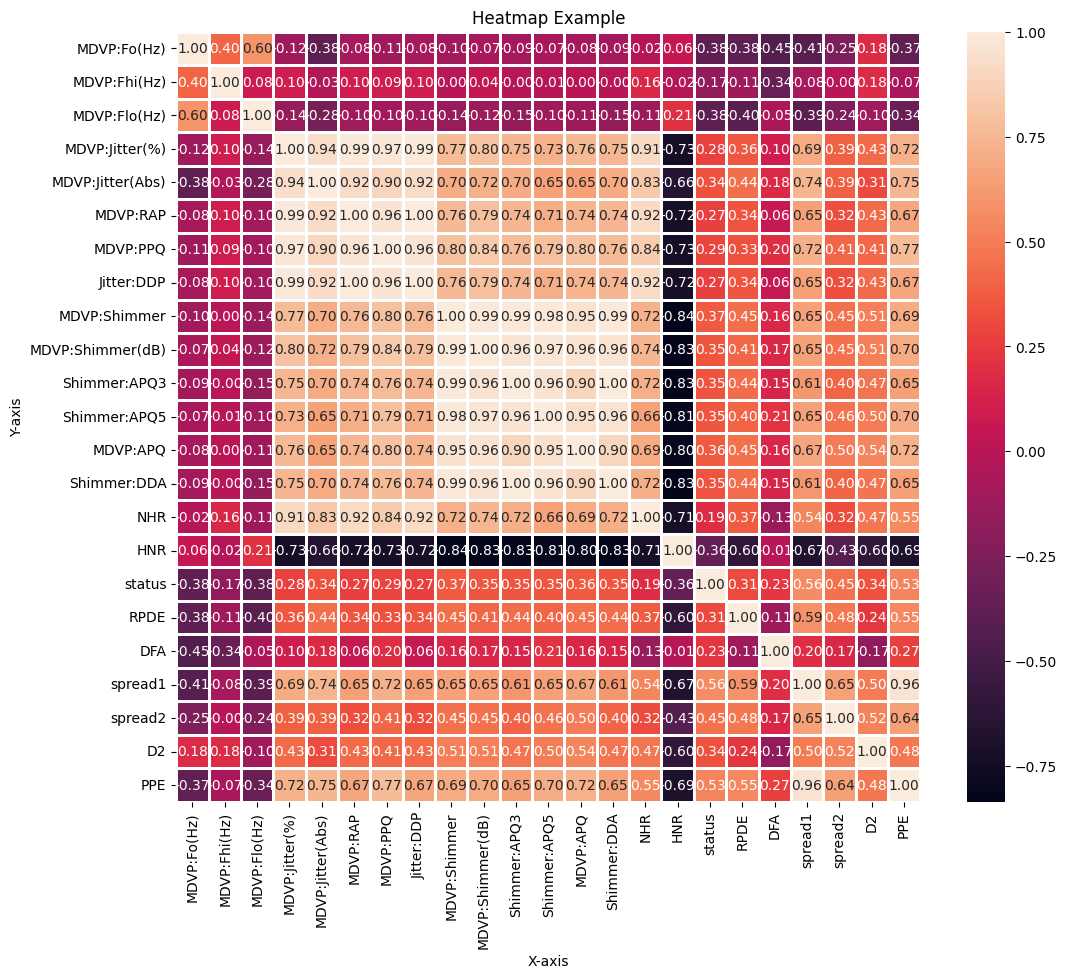

In [4]:
# Create a heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(pk.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title('Heatmap Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [5]:
# Preprocessing: Normalize the feature data using MinMaxScaler
remove_list = ['status','name'] 
x = pk.drop(columns=remove_list, axis=1)
y = pk['status']

In [6]:

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=9)

In [8]:
# Hyperparameter tuning using GridSearchCV for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_
pred_svc = best_svc.predict(x_test)
accuracy_svc = accuracy_score(pred_svc, y_test)
print("Best SVC parameters:", svc_grid.best_params_)
print("SVC accuracy:", round(accuracy_svc * 100, 2), "%")

Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC accuracy: 92.31 %


In [9]:
# Hyperparameter tuning using GridSearchCV for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), lr_param_grid, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_
pred_lr = best_lr.predict(x_test)
accuracy_lr = accuracy_score(pred_lr, y_test)
print("Best LR parameters:", lr_grid.best_params_)
print("Logistic Regression accuracy:", round(accuracy_lr * 100, 2), "%")

Best LR parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression accuracy: 82.05 %


In [10]:
# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_
pred_rf = best_rf.predict(x_test)
accuracy_rf = accuracy_score(pred_rf, y_test)
print("Best Random Forest parameters:", rf_grid.best_params_)
print("Random Forest accuracy:", round(accuracy_rf * 100, 2), "%")

Best Random Forest parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest accuracy: 87.18 %


In [11]:
model = RandomForestClassifier()

In [12]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
pred = model.predict(x_test)
accuracy = accuracy_score(pred,y_test)
print("accuracy : ",round(accuracy*100),"%")

accuracy :  90 %


In [27]:
n = int(input())
a = []
for i in range(0,n):
     t = input().strip()
     a.append(t)
for i in range(0,n): 
    print(a.count(a[i]))
    



TypeError: 'int' object is not iterable

In [31]:
a = ['kavi','sri','kavi','sound']
goals ={}
for i in range(n)

TypeError: 'int' object is not iterable

In [ ]:
import pandas as pd
from itertools import combinations

# Define the players for each team
team_NZ = {
    "Wicket Keepers": ["Conway", "Latham"],
    "Batters": ["Young", "Mitchell"],
    "Allrounders": ["Ravindra", "Neesham", "Santner", "Phillips"],
    "Bowlers": ["Henry", "Boult", "Southee"],
}

team_SA = {
    "Wicket Keepers": ["Dk", "Klassen"],
    "Batters": ["Markram", "Van Der", "Miller", "Bavuma"],
    "Allrounder": ["Jansen"],
    "Bowlers": ["Maharaj", "Coetzee", "Ngidi", "Rabada"],
}

# Define the limits for each category
min_wk, max_wk = 1, 8
min_batter, max_batter = 1, 8
min_allrounder, max_allrounder = 1, 8
min_bowler, max_bowler = 1, 8

# Create a list of players
all_players = {
    "Wicket Keepers": team_NZ["Wicket Keepers"] + team_SA["Wicket Keepers"],
    "Batters": team_NZ["Batters"] + team_SA["Batters"],
    "Allrounders": team_NZ["Allrounders"] + team_SA["Allrounder"],
    "Bowlers": team_NZ["Bowlers"] + team_SA["Bowlers"],
}

# Generate combinations
combinations_list = []

for wk_count in range(min_wk, max_wk + 1):
    for batter_count in range(min_batter, max_batter + 1):
        for allrounder_count in range(min_allrounder, max_allrounder + 1):
            for bowler_count in range(min_bowler, max_bowler + 1):
                if (
                    wk_count + batter_count + allrounder_count + bowler_count
                    == 11
                ):
                    for wk_comb in combinations(all_players["Wicket Keepers"], wk_count):
                        for batter_comb in combinations(all_players["Batters"], batter_count):
                            for allrounder_comb in combinations(all_players["Allrounders"], allrounder_count):
                                for bowler_comb in combinations(all_players["Bowlers"], bowler_count):
                                    combination = {
                                        "Wk": list(wk_comb),
                                        "Batters": list(batter_comb),
                                        "Allrounders": list(allrounder_comb),
                                        "Bowlers": list(bowler_comb),
                                    }
                                    combinations_list.append(combination)

# Create a DataFrame from the combinations
df = pd.DataFrame(combinations_list)

# Save the DataFrame to an Excel file
df.to_excel("cricket_combinations.xlsx", index=False)
